In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#make imports

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255
#scale images

In [5]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]
#add class names 

In [6]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]), 
                                 keras.layers.Dense(300, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(100, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(10, activation = "softmax" )]) 
#build deep NN layers

In [7]:
model.summary()
#summarise model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 286,810
Trainable params: 286,810
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd",
              metrics = ["accuracy"]) 

In [9]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7868 - accuracy: 0.7298 - val_loss: 0.5332 - val_accuracy: 0.8162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4853 - accuracy: 0.8270 - val_loss: 0.4348 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4306 - accuracy: 0.8467 - val_loss: 0.4086 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3983 - accuracy: 0.8571 - val_loss: 0.3809 - val_accuracy: 0.8686
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8651 - val_loss: 0.3632 - val_accuracy: 0.8720
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3568 - accuracy: 0.8705 - val_loss: 0.3828 - val_accuracy: 0.8614
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3407 - accuracy: 0.8768 - val_loss: 0.3440 - val_accuracy:

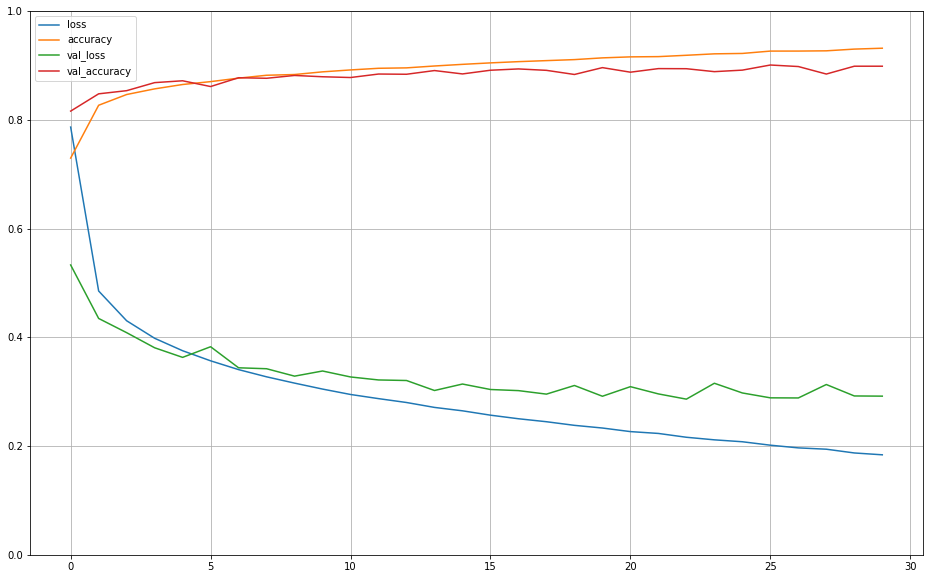

In [10]:
pd.DataFrame(history.history).plot(figsize = (16, 10)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 
#plot loss versus accuracy

In [11]:
model.evaluate(X_test,y_test)
#evalue model

313/313 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8875


[0.33305487036705017, 0.887499988079071]

# Convolutional Neural Networks

In [ ]:
model = keras.models.Sequential([keras.layers.Conv2D(64, 7, activation = "relu", padding = "same", input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation = "relu"), padding = "same"),
                                  keras.layers.Conv2D(128, 3, activation = "relu"), padding = "same"),
                                  keras.layers.MaxPooling2D(2),
                                  keras.layers.Conv2D(256)
                                 ])

In [1]:
# TODO:  add RNN to solve MNIST Fashion

In [2]:
# TODO:  Format document into sections based on approach

In [3]:
# TODO:  Add images from MNIST Fashion data set to notebook 

In [4]:
# TODO:  Add commentary on what is happening with each network

In [5]:
# TODO:  Add conclusion and next steps